In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

### Import data

In [3]:
csv_wt_500ugml = pd.read_csv('csv/20220128_Par2Ring_WT_S75_500ugml.csv')
csv_wt_750ugml = pd.read_csv('csv/20220128_Par2Ring_WT_S75_750ugml.csv')
csv_wt_2000ugml = pd.read_csv('csv/20210927_Par2Ring_WT_S75_2mgml.csv')
csv_wt_5000ugml = pd.read_csv('csv/20210924_Par2Ring_WT_S75_5mgml.csv')
csv_wt_10000ugml = pd.read_csv('csv/20220131_Par2Ring_WT_S75_10mgml.csv')

csv_L109R = pd.read_csv('csv/20210924_Par2Ring_L109R_S75.csv')

csv_lysozyme = pd.read_csv('csv/20210924_Lysozyme_S75_test.csv')

In [32]:
def correlation_fig(csv, xlim=[10.5, 13.5], c='tab:blue', fig=None, ax=None):
    
    # Create figure
    if fig is None:
        fig, ax = plt.subplots()
    
    # Modify csv
    csv.columns = ['Time', 'RIU', 'Molar mass']
    csv.replace(' ', 'NaN', inplace=True)
    csv['Molar mass'] = csv['Molar mass'].astype(float)
    
    # Auto mol weight limits
    max_riu = np.max(csv.RIU[(csv.Time * 0.5 > xlim[0]) * (csv.Time * 0.5 < xlim[1])])
    thresh = 0.8 * max_riu 
    mw_xlim = csv.Time.values[np.abs(np.diff(np.sign(csv.RIU.values - thresh), prepend=0)) == 2] * 0.5
    
    # Crop mol weight data
    mw_bool = (csv.Time.values * 0.5 > mw_xlim[0]) * (csv.Time.values * 0.5 < mw_xlim[1])
    
    # Plot data    
    ax.scatter(np.mean(csv.RIU[mw_bool] * 10000), np.mean(csv['Molar mass'][mw_bool] / 1000), c=c)
    ax.scatter(np.max(csv.RIU[mw_bool] * 10000), np.max(csv['Molar mass'][mw_bool] / 1000), c='tab:orange')
    
    return fig, ax

<IPython.core.display.Javascript object>


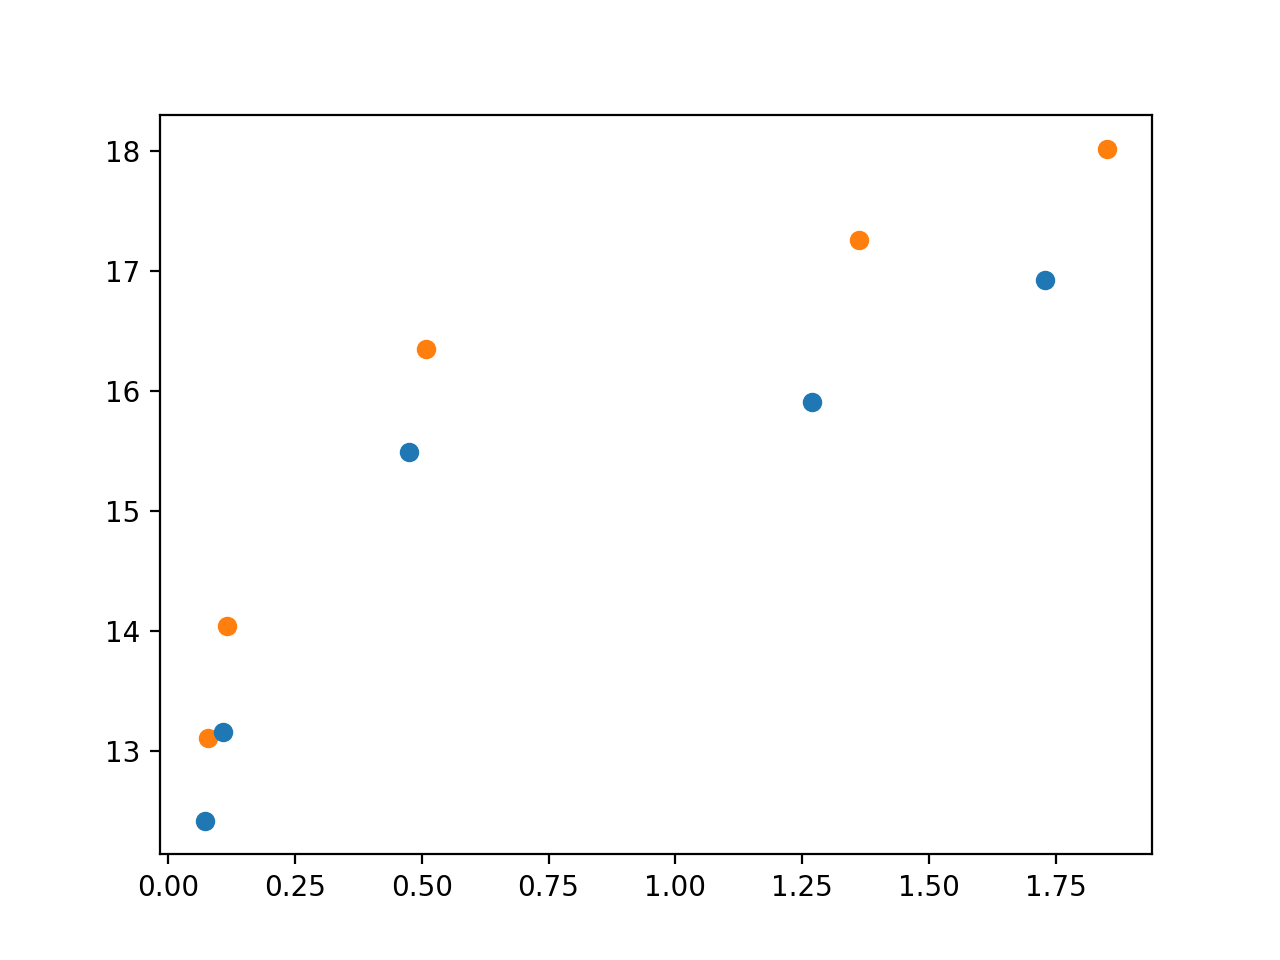

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [33]:
fig, ax = plt.subplots()
correlation_fig(csv_wt_500ugml, fig=fig, ax=ax)
correlation_fig(csv_wt_750ugml, fig=fig, ax=ax)
correlation_fig(csv_wt_2000ugml, fig=fig, ax=ax)
correlation_fig(csv_wt_5000ugml, fig=fig, ax=ax)
correlation_fig(csv_wt_10000ugml, fig=fig, ax=ax)

In [28]:
def correlation_fig2(csv, x, xlim=[10.5, 13.5], c='tab:blue', fig=None, ax=None):
    
    # Create figure
    if fig is None:
        fig, ax = plt.subplots()
    
    # Modify csv
    csv.columns = ['Time', 'RIU', 'Molar mass']
    csv.replace(' ', 'NaN', inplace=True)
    csv['Molar mass'] = csv['Molar mass'].astype(float)
    
    # Auto mol weight limits
    max_riu = np.max(csv.RIU[(csv.Time * 0.5 > xlim[0]) * (csv.Time * 0.5 < xlim[1])])
    thresh = 0.8 * max_riu 
    mw_xlim = csv.Time.values[np.abs(np.diff(np.sign(csv.RIU.values - thresh), prepend=0)) == 2] * 0.5
    
    # Crop mol weight data
    mw_bool = (csv.Time.values * 0.5 > mw_xlim[0]) * (csv.Time.values * 0.5 < mw_xlim[1])
    
    # Plot data    
    ax.scatter(x, np.mean(csv['Molar mass'][mw_bool] / 1000), c=c)
    ax.scatter(x, np.max(csv['Molar mass'][mw_bool] / 1000), c='tab:orange')
    
    return fig, ax

<IPython.core.display.Javascript object>


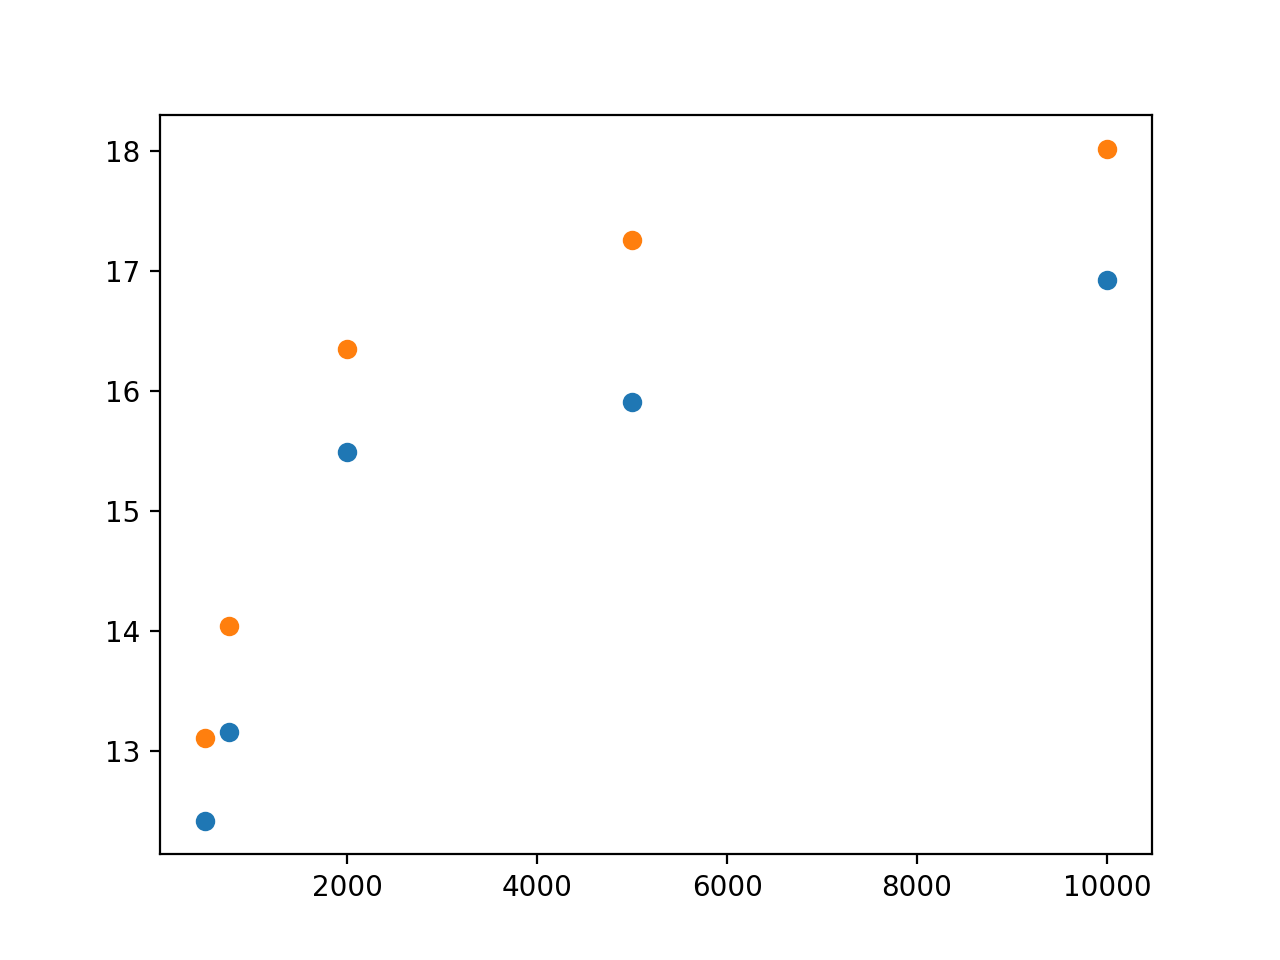

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [29]:
fig, ax = plt.subplots()
correlation_fig2(csv_wt_500ugml, 500, fig=fig, ax=ax)
correlation_fig2(csv_wt_750ugml, 750, fig=fig, ax=ax)
correlation_fig2(csv_wt_2000ugml, 2000, fig=fig, ax=ax)
correlation_fig2(csv_wt_5000ugml, 5000, fig=fig, ax=ax)
correlation_fig2(csv_wt_10000ugml, 10000, fig=fig, ax=ax)